<a href="https://colab.research.google.com/github/LahiWeer/2330902_20230537_CM2604-ML_CW/blob/master/Preprocessing/S2_Label_Encoding_and_One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
original_data_url = 'https://raw.githubusercontent.com/LahiWeer/2330902_20230537_CM2604-ML_CW/refs/heads/master/Resources/new-bank-additional-full.csv'
data = pd.read_csv(original_data_url)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###  **Label Encoding for 'default' column**
 - Map 'no' to 0, 'yes' to 1, and 'unknown' to -1.

In [ ]:
# Check value counts of 'default' column to understand the distribution of 'default' column values
data['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [ ]:
# Map 'default' column values
data['default'] = data['default'].map({'no': 0, 'yes': 1, 'unknown': -1})

### **Label Encoding for 'housing' column**
- Map 'no' to 0, 'yes' to 1, and 'unknown' to -1.

In [ ]:
# Check value counts of 'housing' column
data['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [ ]:
# Map 'housing' column values
data['housing'] = data['housing'].map({'no': 0, 'yes': 1, 'unknown': -1})

### **Label Encoding for 'loan' column**
 - Map 'no' to 0, 'yes' to 1, and 'unknown' to -1.

In [ ]:
data['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [ ]:
data['loan'] = data['loan'].map({'no': 0, 'yes': 1, 'unknown': -1})

### **Label Encoding for 'contact' column**
- Map 'cellular' to 1 and 'telephone' to 0.

In [ ]:
data['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [ ]:
data['contact'] = data['contact'].map({'cellular': 1, 'telephone': 0})

### **Label Encoding for 'month' column**
 - Map month names to their corresponding numerical values.

In [ ]:
data['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [ ]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data['month'] = data['month'].map(month_mapping)

**Label Encoding for 'day_of_week' column**
 - Map days to numerical values.

In [ ]:
data['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [ ]:
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
data['day_of_week'] = data['day_of_week'].map(day_mapping)

### **Label Encoding for 'poutcome' column**
- Map 'nonexistent' to -1, 'failure' to 0, and 'success' to 1.

In [ ]:
data['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [ ]:
poutcome_mapping = {'nonexistent': -1, 'failure': 0, 'success': 1}
data['poutcome'] = data['poutcome'].map(poutcome_mapping)

### **Label Encoding for 'education' column**
 - Map education levels to corresponding numerical values.

In [ ]:
data['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [ ]:
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 0  # Treat 'unknown' the same as 'illiterate'
}

data['education'] = data['education'].map(education_mapping)

In [ ]:
data['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [ ]:
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

### **Handling Missing Values**
 - Replace 'unknown' with NaN in 'marital' and 'job' columns.
 - Drop rows containing NaN in these columns.

In [ ]:
# Replace "unknown" with NaN
columns_to_consider = ["marital","job"]
data = data.replace("unknown", np.nan)

# Before dropping rows, print the number of rows before dropping
rows_before = len(data)
print(f"Rows before removing unknown values: {rows_before}")

# Drop rows with NaN in specified columns
data = data.dropna(subset=columns_to_consider)

# After dropping rows, print the number of rows after dropping
rows_after = len(data)
print(f"Rows after removing unknown values: {rows_after}")

# Print how many rows were dropped
rows_deleted = rows_before - rows_after
print(f"Rows dropped after removing unknown values: {rows_deleted}")

Rows before removing unknown values: 41188
Rows after removing unknown values: 40787
Rows dropped after removing unknown values: 401


### **One-Hot Encoding for 'marital' column**
- Create binary columns: 'marital_single', 'marital_married', 'marital_divorced'.


In [ ]:
# Identify the position of the original 'marital' column
marital_index = data.columns.get_loc('marital')

data['marital_single'] = (data['marital'] == 'single').astype(int)
data['marital_married'] = (data['marital'] == 'married').astype(int)
data['marital_divorced'] = (data['marital'] == 'divorced').astype(int)

# Drop the original 'marital' column
data.drop(columns=['marital'], inplace=True)

# Insert the new columns at the original position of 'marital'
data.insert(marital_index, 'marital_single', data.pop('marital_single'))
data.insert(marital_index + 1, 'marital_married', data.pop('marital_married'))
data.insert(marital_index + 2, 'marital_divorced', data.pop('marital_divorced'))

# Verify the column order
print(data.columns)

Index(['age', 'job', 'marital_single', 'marital_married', 'marital_divorced',
       'education', 'default', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


### **One-Hot Encoding for 'job' column**
- Create binary columns for each job category.

In [ ]:
# Identify the position of the original 'job' column
job_index = data.columns.get_loc('job')

# Perform One-Hot Encoding for 'job' column
job_dummies = pd.get_dummies(data['job'], prefix='job', drop_first=True)

# Drop the original 'job' column
data.drop(columns=['job'], inplace=True)

# Convert boolean True/False in job_dummies to 1/0
job_dummies = job_dummies.astype(int)

# Insert the new job columns at the original position of 'job'
for i, col in enumerate(job_dummies.columns):
    data.insert(job_index + i, col, job_dummies[col])

# Verify the changes
print(data.head(10))

   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56                0                 0              1               0   
1   57                0                 0              0               0   
2   37                0                 0              0               0   
3   40                0                 0              0               0   
4   56                0                 0              0               0   
5   45                0                 0              0               0   
6   59                0                 0              0               0   
7   41                1                 0              0               0   
8   24                0                 0              0               0   
9   25                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1  

### **Label Encoding for target variable 'y'**
 - Map 'yes' to 1 and 'no' to 0.

In [ ]:
# Encode target variable
data['y'] = data['y'].map({"yes": 1, "no": 0}).astype(int)

### **Drop 'duration' column**
 - Exclude 'duration' as it is highly predictive but unavailable at the time of prediction.


In [ ]:
# Drop `duration` column for the realistic predictive model
data_no_duration = data.drop(columns=["duration"])


### **Correlation Analysis**
 - Compute and visualize the correlation matrix, highlighting the relationship between variables and the target.


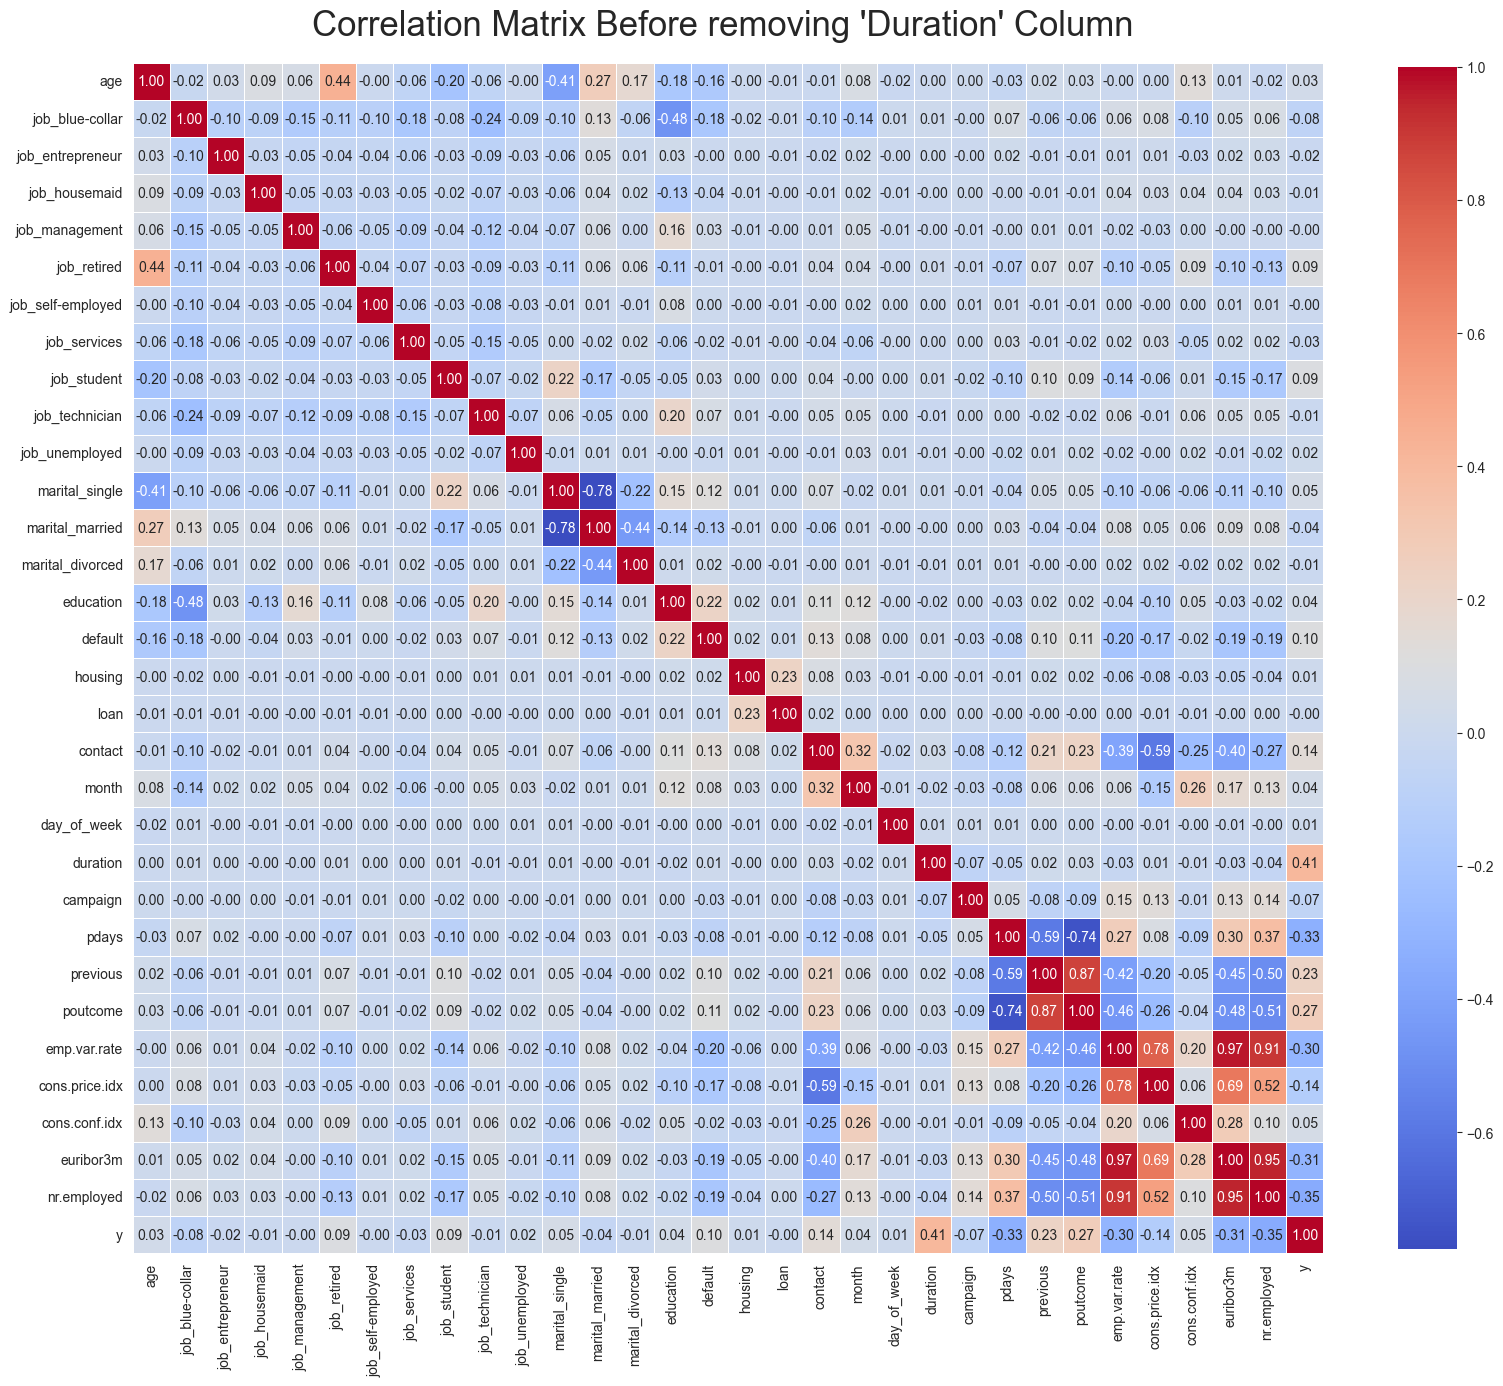

In [ ]:
# Compute correlations (using only numerical columns)
correlation_matrix = data.corr()

# Define cell size (in pixels)
cell_size = 0.6  # Adjust this for larger or smaller cells

# Calculate figure size dynamically based on the number of rows/columns
num_vars = len(correlation_matrix.columns)
fig_size = num_vars * cell_size

# Create the heatmap with custom settings
plt.figure(figsize=(fig_size, fig_size))  # Dynamically adjust figure size
sns.heatmap(
    correlation_matrix,
    annot=True,               # Show values in each cell
    fmt=".2f",                # Format for annotation text
    cmap="coolwarm",          # Color map
    cbar=True,                # Display color bar
    square=True,              # Ensure square cells
    linewidths=0.5,           # Add spacing between cells
    linecolor="white",         # Line color for spacing
    cbar_kws={'shrink': 0.8}  # Shrink the color bar to 80% of its default size
)


# Add a title to the heatmap
plt.title("Correlation Matrix Before removing 'Duration' Column ", fontsize=25, pad=20)
# # Add a title
# plt.title("Correlation Matrix ")
plt.show()

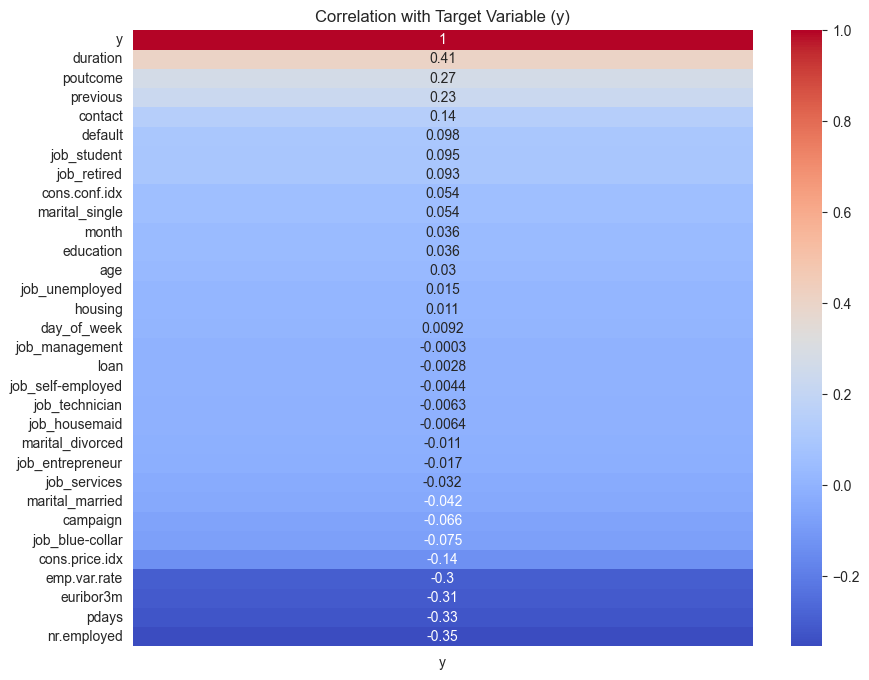

In [ ]:
# Visualize correlation with the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['y']].sort_values(by='y', ascending=False),
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation with Target Variable (y)")
plt.show()

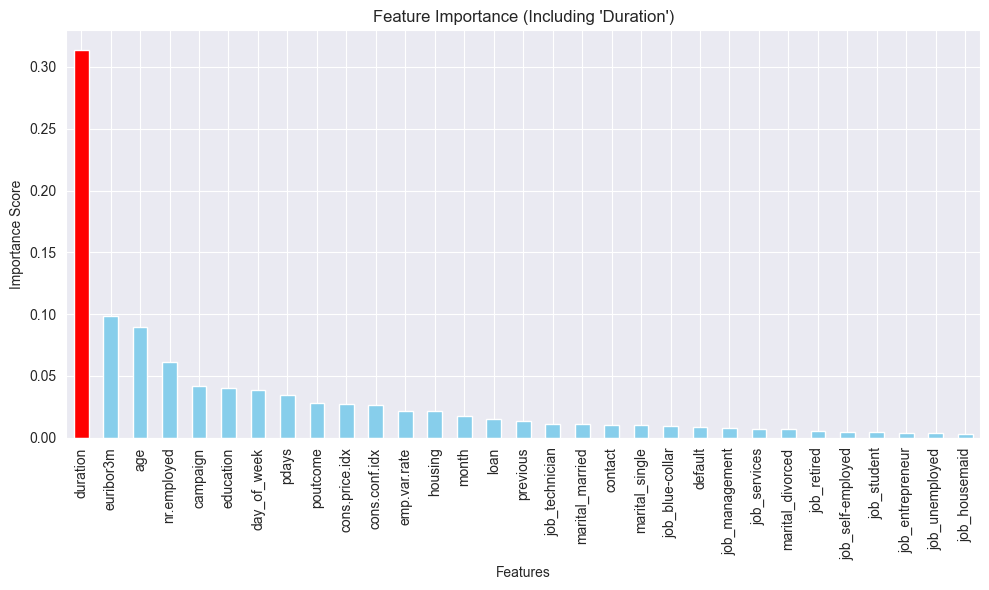


Feature importance indicates 'duration' is highly predictive. However, it is excluded from the final model as it is not known before the call.


In [ ]:
# Feature importance simulation for visualization
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing target
data = data.dropna(subset=["y"])

# Fill missing values for simplicity
data.fillna(data.mode().iloc[0], inplace=True)

# Label encode categorical variables for simplicity
le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

# Split into X (features) and y (target)
X = data.drop(columns=["y"])
y = data["y"]

# Fit Random Forest to compute feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Create feature importance plot
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(
    kind="bar",
    color=["red" if feature == "duration" else "skyblue" for feature in importances.index]
)

plt.title("Feature Importance (Including 'Duration')")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.axhline(y=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

# Note: Highlight 'duration' in the plot or explain its exclusion
print("\nFeature importance indicates 'duration' is highly predictive. "
      "However, it is excluded from the final model as it is not known before the call.")


In [ ]:
data.to_csv("processed_bank_data.csv", index=False)